In [1]:
#making urdu news classifier using tf-idf vectorizer
import os
import pandas as pd

In [9]:
def combiner(path):
    news=[]
    for file in os.listdir(path):
        if file.endswith('.txt'):
            filepath=os.path.join(path,file)
            with open(filepath,'r',encoding='utf-8') as f:
                sentence=f.read()
                news.append(sentence)

    return news
                
    

In [10]:
path='Test/Fake'
dfake=pd.DataFrame(combiner(path),columns=['news'])
dfake['label']=0

In [11]:
dfake

,news,label
0,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 03 دسمب...,0
1,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,0
2,\n\nبیجنگ چینی حکومت نے امریکا سے تیل کی خریدا...,0
3,\n\nلاہور(کامرس رپورٹر) لاہور چیمبر کے صدر الم...,0
4,\nکوئٹہ ( آن لائن ) چینی ریسرچ اور سرمایہ کار ...,0
...,...,...
107,لاہور (ڈیلی پاکستان آن لائن) وفاقی حکومت نے رج...,0
108,اسلام آباد(نیو زڈیسک،19 اکتوبر 2018) سائنسدان...,0
109,نیو یارک (ڈیلی پاکستان آن لائن) فوٹو شیئرنگ وی...,0
110,﻿ایک جاپانی کہاوت ہے ' اگر آپ بڑے نہیں ہوئے تو...,0


In [13]:
dreal=pd.DataFrame(combiner('Test/Real'),columns=['news'])
dreal['label']=1
dreal

,news,label
0,چین کے صدر شی جن پنگ نے منگل کے روز چین کی منڈ...,1
1,تصویر کے کاپی رائٹ AFP\n\nپاکستانی وزیرِ خارجہ...,1
2,اسلام آباد: عالمی مالیاتی کریڈٹ ریٹنگ ایجنسی ...,1
3,سٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 03 دسمبر2...,1
4,\nکراچی ( آن لائن ) عوام کو اب پاکستان سے باہر...,1
...,...,...
145,لاہور (ڈیلی پاکستان آن لائن) وفاقی حکومت نے غی...,1
146,اسلام آباد(نیو زڈیسک)سائنسدانوں نے دماغ کے ای...,1
147,نیو یارک (ڈیلی پاکستان آن لائن) فوٹو شیئرنگ وی...,1
148,ایک انگریزی کہاوت ہے ' اگر آپ فروخت نہیں ہوئے ...,1


In [14]:
df=pd.concat([dfake,dreal],axis=0)
df.head(5)

,news,label
0,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 03 دسمب...,0
1,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,0
2,\n\nبیجنگ چینی حکومت نے امریکا سے تیل کی خریدا...,0
3,\n\nلاہور(کامرس رپورٹر) لاہور چیمبر کے صدر الم...,0
4,\nکوئٹہ ( آن لائن ) چینی ریسرچ اور سرمایہ کار ...,0


In [15]:
#stopwords is urdu
stopwords = [
    "اور", "ہے", "میں", "کی", "کو", "سے", "کا", "یہ", "ایک", "کہ", "گی", 
    "گے", "ہیں", "ہوں", "پر", "نے", "کر", "دی", "یا", "تھا", "تھی", "تھے", 
    "تو", "اگر", "بھی", "کیے", "ہو", "والا", "والی", "والے", "جس", "جن", 
    "کیوں", "یہاں", "وہاں", "جنہیں", "جنہيں", "کرنا", "کرنے", "کرکے", 
    "ہونا", "ہونے", "ہوں", "کیونکہ", "تک", "تاکہ", "کرتا", "کرتی", 
    "کرتے", "کررہا", "کررہی", "کررہے", "کرچکا", "کرچکی", "کرچکے", 
    "کرچکا", "کرچکی", "کرچکے", "کرچکیں", "کروں", "کرو", "کرے", "کریں", 
    "کرتے", "کرتی", "کرتا", "رہا", "رہی", "رہے", "چکا", "چکی", "چکے", 
    "چکیں", "سکتا", "سکتی", "سکتے", "سکیں", "چاہیے", "ہوگی", "ہوگا", 
    "ہوں", "ہو", "ہے", "ہیں", "تھا", "تھی", "تھے", "ہوتا", "ہوتی", 
    "ہوتے", "ہوتیں", "تک", "تاکہ", "دو", "دوں", "دینا", "دی", "دے", 
    "دوں", "دیتا", "دیتی", "دیتے", "دیتیں", "ہوا", "ہوئی", "ہوئے", 
    "ہوا", "ہو", "ہوں", "ہے", "ہیں", "تھا", "تھی", "تھے", "میں", "کے", 
    "سے", "نے", "کہ", "یہ", "کی", "کا", "کو", "جو", "یہاں", "وہاں", "کیسے"
]


In [17]:
def cleaned(x):
    import re 
    corpus = []
    for i in range(len(x)):
        cleaned=re.sub('[0-9a-zA-Z~!@#$%^&*()_+{}":?><,./;=]', ' ', x[i])
        cleaned=cleaned.split()
        cleaned=[word for word in cleaned if word not in stopwords]
        cleaned=' '.join(cleaned)
        corpus.append(cleaned)
    return corpus
    


In [20]:

corpus=cleaned(df['news'].values)
print(type(corpus),len(corpus))
y=df['label']

<class 'list'> 262


In [26]:
#now using tf-idf score
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,3))


In [27]:
x=tfidf.fit_transform(corpus).toarray()

In [28]:
x.shape

(262, 96017)

In [30]:

from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.20,random_state=21)
print(trainx.shape,len(testx)


(209, 96017) 53


In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(trainx,trainy)

PassiveAggressiveClassifier()

In [33]:
predictedy=pac.predict(testx)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy of our model is {:.2f}%".format(accuracy_score(testy,predictedy)*100))
print("\nclassification report is \n",classification_report(testy,predictedy))


accuracy of our model is 32.08%

classification report is 
               precision    recall  f1-score   support

           0       0.07      0.04      0.05        24
           1       0.41      0.55      0.47        29

    accuracy                           0.32        53
   macro avg       0.24      0.30      0.26        53
weighted avg       0.26      0.32      0.28        53



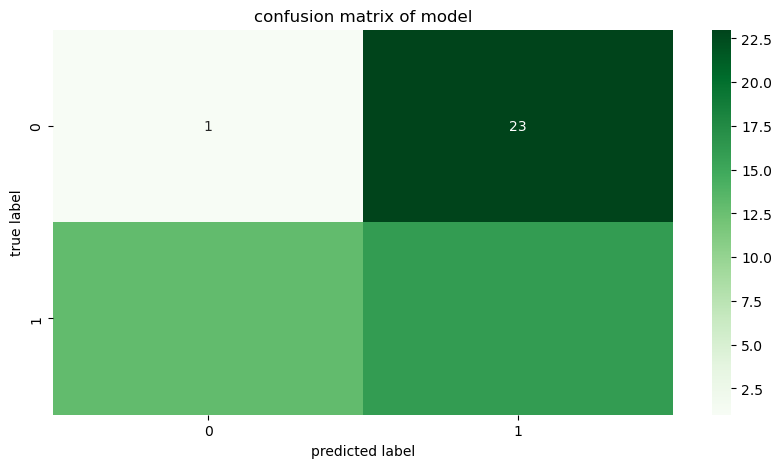

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(testy,predictedy),annot=True,fmt='d',cmap='Greens')
plt.title("confusion matrix of model")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [37]:
#at this time we have small data.
def check():
    news=[str(input("enter news:"))]
    cleaned_news=cleaned(news)
    array=tfidf.transform(cleaned_news)
    #predicting using passive aggressive classifier because it has higher accuracy
    passive=pac.predict(array)
    if passive==0:
        print('the news is fake')
    else:
        print('the news is correct')



In [39]:
check()

enter news: چین کی جانب سے پاکستان کی مدد کرنے سے انکا


the news is correct


In [40]:
#accuracy is low because data is not clearly labeled
#apply model on well labeled data , accuracy will be better